## 이미지 데이터 분류 
- 데이터 : sklearn.datasets의 MNIST ==> 디지털 숫자 0~9 손글씨 데이터셋
- 피쳐 : 이미지의 픽셀 수, 28 * 28 = 784
- 타깃 : 0 ~ 9, 총 10개
- 학습유형 : 지도학습 + 분류



### (1) 모듈 로딩 및 데이터 준비
<hr>

In [1]:
from sklearn.datasets import fetch_openml
from sklearnex import patch_sklearn
import numpy as np
patch_sklearn()
mnist = fetch_openml('mnist_784', as_frame=False)
mnist.keys()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
X = mnist['data']
y = mnist['target']

type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [3]:
y_5 = (y == '5')


In [4]:
featureDF = mnist['data'] / 255
np.max(featureDF)
target = mnist['target']
target = target.astype('int')
np.unique(target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### (3) 기계학습용 데이터셋 준비
<hr>

- 학습용 검증용 테스트용 3개 데이터셋 준비


In [5]:
featureDF[:2]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:

X_train = featureDF[:60000]
y_train = target[:60000]
X_test = featureDF[60000:]
y_test = target[60000:]

y_5_train = y_train# == 5
y_5_test = y_test# == 5

X_train.shape, X_test.shape, y_5_train.shape, y_5_test.shape,

((60000, 784), (10000, 784), (60000,), (10000,))

In [7]:
# 학습용 검증용 분리 => 학습용 데이터셋에서 일부를 검증용으로 준비
# 검증용 : 학습시 모델 최적화가 잘 되는지 검사하는 데이터
from sklearn.model_selection import train_test_split
X_train, X_val, y_5_train, y_5_val = train_test_split(
    X_train, 
    y_5_train,
    test_size=0.2, 
    stratify=y_5_train,
    random_state=42,
)


### (4) 학습 진행
<hr>

#### (4-1) Logistic Regression 사용

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

model = Pipeline(
    [
        ('scaler', StandardScaler()), 
        # ('sgd', SGDClassifier(loss='log_loss',max_iter=100, random_state=42, n_jobs=-1))
        ('logistic', LogisticRegression(random_state=42, max_iter=10000, tol=0.0000001, n_jobs=-1))
    ]
)   

model.fit(X_train, y_5_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(max_iter=10000, n_jobs=1, random_state=42,
                                    tol=1e-07))])

In [9]:
model[-1].n_iter_

array([862])

In [10]:
train_score = model.score(X_train, y_5_train)
val_score = model.score(X_val, y_5_val)

print(f"train score : {train_score}, test_score : {val_score}")

train score : 0.9465833333333333, test_score : 0.9126666666666666


### (5) 학습 모델 성능 평가
<hr>


In [11]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay


In [12]:
# 클래스 비율
np.unique(y_5_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([4738, 5394, 4766, 4905, 4674, 4337, 4734, 5012, 4681, 4759],
       dtype=int64))

In [13]:
np.unique(y, return_counts=True)

(array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object),
 array([6903, 7877, 6990, 7141, 6824, 6313, 6876, 7293, 6825, 6958],
       dtype=int64))

In [14]:
np.unique(y_5_test, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009],
       dtype=int64))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       980
           1       0.95      0.98      0.97      1135
           2       0.93      0.88      0.90      1032
           3       0.89      0.91      0.90      1010
           4       0.93      0.92      0.93       982
           5       0.88      0.86      0.87       892
           6       0.93      0.94      0.94       958
           7       0.93      0.92      0.92      1028
           8       0.88      0.88      0.88       974
           9       0.90      0.92      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

f1 score : 0.9162538694062821


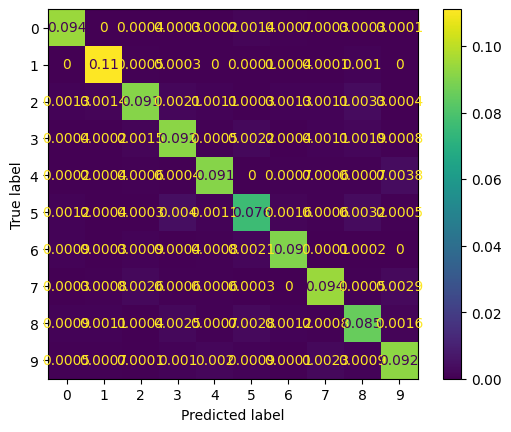

In [15]:

model.score(X_val, y_5_val)
print(classification_report(y_5_test, model.predict(X_test)))
print(f"f1 score : {f1_score(y_5_test, model.predict(X_test), average='macro')}")

ConfusionMatrixDisplay(confusion_matrix(y_5_test, model.predict(X_test), normalize='all')).plot()

In [16]:
from pycaret.classification import *

s = setup(data = X, target = y_5, session_id=123, n_jobs=-1)

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Original data shape,"(70000, 785)"
4,Transformed data shape,"(70000, 785)"
5,Transformed train set shape,"(49000, 785)"
6,Transformed test set shape,"(21000, 785)"
7,Numeric features,784
8,Preprocess,True
9,Imputation type,simple


In [17]:
# best = s.compare_models(n_select=5)